In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emachine as EM

In [2]:
np.random.seed(0)

In [3]:
seqs = np.loadtxt('s_train.dat')

In [4]:
ops = EM.operators(seqs)
ops.shape

(787, 528)

In [5]:
eps_list = np.linspace(0.7,0.9,21)
E_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):    
    w_eps[i,:],E_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    print(eps,E_eps[i])

0.7 -53.47386263757198
0.71 -53.11598942493712
0.72 -52.79594483915088
0.73 -52.51457302133103
0.74 -52.27294083537119
0.75 -52.072371923624054
0.76 -51.91448868262882
0.77 -51.80126408024199
0.78 -51.73508585406411
0.79 -51.718836477479236
0.8 -51.75599344830873
0.81 -51.850756086017164
0.8200000000000001 -52.008207327023435
0.8300000000000001 -52.234522304693876
0.84 -52.53724028723956
0.85 -52.92562360340369
0.86 -53.411137761826055
0.87 -54.008103104111704
0.88 -54.73459341981724
0.89 -55.61369677322355
0.9 -56.67531840479335


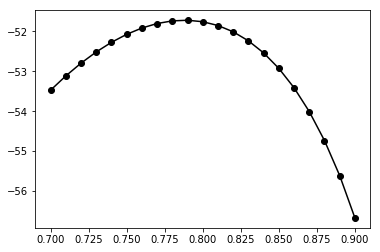

In [6]:
plt.plot(eps_list,E_eps,'ko-')

In [7]:
ieps = np.argmax(E_eps)
print('The optimal value of eps:',eps_list[ieps])

The optimal value of eps: 0.79


So our inferred interactions from our eps machine should be

In [8]:
w_em = w_eps[ieps]

np.savetxt('w_em.dat',w_em,fmt='%f')

In [9]:
## # Maximum Likelihood Estimation (MLE)
#w_mle = EM.MLE_method(seqs)
#np.savetxt('w_mle.dat',w_mle,fmt='%f')

# Pseudo Likelihood Estimation (PLE)
w_ple = EM.PLE_method(seqs)
np.savetxt('w_ple.dat',w_ple,fmt='%f')